<a href="https://colab.research.google.com/github/starzs3cret/Data_analisis/blob/main/DQlab_Data_Analisis_End.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning With Python for Beginner

In [ ]:
import pandas as pd
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/online_raw.csv')
print('Shape dataset:', dataset.shape)
print('\nLima data teratas:\n', dataset.head())
print('\nInformasi dataset:')
print(dataset.info())
print('\nStatistik deskriptif:\n', dataset.describe())

Shape dataset: (12330, 18)

Lima data teratas:
    Administrative  Administrative_Duration  ...  Weekend  Revenue
0             0.0                      0.0  ...    False    False
1             0.0                      0.0  ...    False    False
2             0.0                     -1.0  ...    False    False
3             0.0                      0.0  ...    False    False
4             0.0                      0.0  ...     True    False

[5 rows x 18 columns]

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Durati

## Cek Korelasi


In [ ]:
dataset_corr = dataset.corr()
print('Korelasi dataset:\n', dataset.corr())
print('Distribusi Label (Revenue):\n', dataset['Revenue'].value_counts())
# Tugas praktek
print('\nKorelasi BounceRates-ExitRates:', dataset_corr.loc['BounceRates', 'ExitRates'])
print('\nKorelasi Revenue-PageValues:', dataset_corr.loc['Revenue', 'PageValues'])
print('\nKorelasi TrafficType-Weekend:', dataset_corr.loc['TrafficType', 'Weekend'])

Korelasi dataset:
                          Administrative  ...   Revenue
Administrative                 1.000000  ...  0.138631
Administrative_Duration        0.601466  ...  0.093395
Informational                  0.376782  ...  0.095085
Informational_Duration         0.255757  ...  0.070250
ProductRelated                 0.430832  ...  0.158280
ProductRelated_Duration        0.373647  ...  0.152130
BounceRates                   -0.223474  ... -0.150621
ExitRates                     -0.316192  ... -0.206886
PageValues                     0.098771  ...  0.492569
SpecialDay                    -0.095054  ... -0.082305
OperatingSystems              -0.006459  ... -0.014668
Browser                       -0.025243  ...  0.023984
Region                        -0.005680  ... -0.011595
TrafficType                   -0.033748  ... -0.005113
Weekend                        0.026404  ...  0.029295
Revenue                        0.138631  ...  1.000000

[16 rows x 16 columns]
Distribusi Label (Reve

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


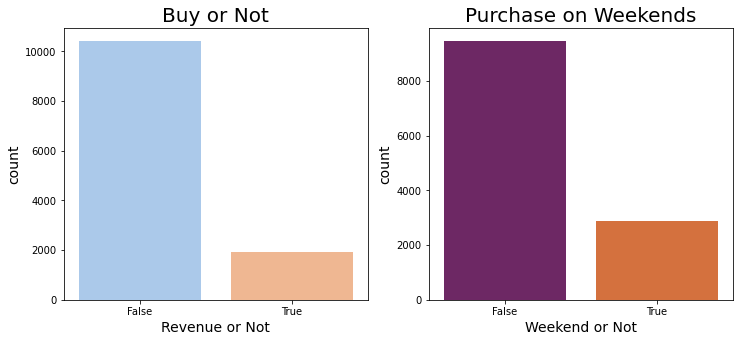

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# checking the Distribution of customers on Revenue
plt.rcParams['figure.figsize']=(12,5)
plt.subplot(1,2,1)
sns.countplot(dataset['Revenue'],palette = 'pastel')
plt.title('Buy or Not',fontsize=20)
plt.xlabel('Revenue or Not',fontsize=14)
plt.ylabel('count',fontsize=14)
# checking the Distribution of customers on Weekend
plt.subplot(1,2,2)
sns.countplot(dataset['Weekend'],palette='inferno')
plt.title('Purchase on Weekends',fontsize=20)
plt.xlabel('Weekend or Not',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.show()

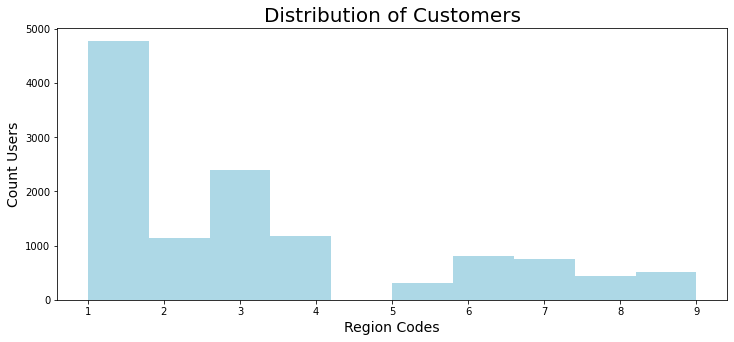

In [ ]:
import matplotlib.pyplot as plt
# visualizing the distribution of customers around the Region
plt.hist(dataset['Region'], color = 'lightblue')
plt.title('Distribution of Customers', fontsize = 20)
plt.xlabel('Region Codes', fontsize = 14)
plt.ylabel('Count Users', fontsize = 14)
plt.show()

## Missing Value


In [ ]:
#checking missing value for each feature  
print('Checking missing value for each feature:')
print(dataset.isnull().sum())
#Counting total missing value
print('\nCounting total missing value:')
print(dataset.isnull().sum().sum())

Checking missing value for each feature:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Counting total missing value:
112


### drop missing value


In [ ]:
#Drop rows with missing value   
dataset_clean = dataset.dropna()  
print('Ukuran dataset_clean:', dataset_clean.shape) 

Ukuran dataset_clean: (12316, 18)


### input missing value instead


In [ ]:
print("Before imputation:")
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with mean of feature value  
dataset.fillna(dataset.mean(), inplace = True)
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

In [ ]:
import pandas as pd
dataset1 = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/online_raw.csv')

print("Before imputation:")
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with median of feature value  
dataset1.fillna(dataset1.median(), inplace = True)
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

## Scaling
0-1

In [ ]:
from sklearn.preprocessing import MinMaxScaler  
#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  
#list all the feature that need to be scaled  
scaling_column = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
#Apply fit_transfrom to scale selected feature  
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])
#Cheking min and max value of the scaling_column
print(dataset[scaling_column].describe().T[['min','max']])

                         min  max
Administrative           0.0  1.0
Administrative_Duration  0.0  1.0
Informational            0.0  1.0
Informational_Duration   0.0  1.0
ProductRelated           0.0  1.0
ProductRelated_Duration  0.0  1.0
BounceRates              0.0  1.0
ExitRates                0.0  1.0
PageValues               0.0  1.0


## convert string to numerik


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Convert feature/column 'Month'
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
print(LE.classes_)
print(np.sort(dataset['Month'].unique()))
print('')

# Convert feature/column 'VisitorType'
LE = LabelEncoder()
dataset['VisitorType']=LE.fit_transform(dataset['VisitorType'])
print(LE.classes_)
print(np.sort(dataset['VisitorType'].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0 1 2 3 4 5 6 7 8 9]

['New_Visitor' 'Other' 'Returning_Visitor']
[0 1 2]


## Modeling, Feature & label



In [ ]:
# removing the target column Revenue from dataset and assigning to X
X = dataset.drop(['Revenue'],axis=1)
# assigning the target column Revenue to y
y = dataset['Revenue']
# checking the shapes
print("Shape of X:",X.shape)
print("Shape of y:",y.shape)

Shape of X: (12330, 17)
Shape of y: (12330,)


## training and test dataset


In [ ]:
from sklearn.model_selection import train_test_split
# splitting the X, and y
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
# checking the shapes
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (9864, 17)
Shape of y_train: (9864,)
Shape of X_test: (2466, 17)
Shape of y_test: (2466,)


### Training Model: fit

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Call the classifier
model = DecisionTreeClassifier()
# Fit the classifier to the training data
model = model.fit(X_train,y_train)

### Training Model: Predict


In [ ]:
# Apply the classifier/model to the test data
y_pred = model.predict(X_test)
print(y_pred.shape)

(2466,)


## Evaluasi Model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# evaluating the model
print('Training Accuracy :', model.score(X_train,y_train))
print('Testing Accuracy :', model.score(X_test,y_test))

# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test,y_pred)
print(cm)

# classification report
print('\nClassification report:')
cr = classification_report(y_test,y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8605028386050284

Confusion matrix:
[[1883  161]
 [ 183  239]]

Classification report:
              precision    recall  f1-score   support

       False       0.91      0.92      0.92      2044
        True       0.60      0.57      0.58       422

    accuracy                           0.86      2466
   macro avg       0.75      0.74      0.75      2466
weighted avg       0.86      0.86      0.86      2466



## Logistic Regression
Binary Clasifikaasi

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train,y_train)
#Training Model: Predict 
y_pred = logreg.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', model.score(X_train,y_train))  
print('Testing Accuracy :', model.score(X_test,y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test,y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8605028386050284

Confusion matrix
[[2010   34]
 [ 316  106]]

Classification report
              precision    recall  f1-score   support

       False       0.86      0.98      0.92      2044
        True       0.76      0.25      0.38       422

    accuracy                           0.86      2466
   macro avg       0.81      0.62      0.65      2466
weighted avg       0.85      0.86      0.83      2466



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Decission Tree
model kayak nested if terus sampe banyak banget

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = (0.3), random_state = 0)

# Call the classifier
decision_tree = DecisionTreeClassifier()
# Fit the classifier to the training data
decision_tree = decision_tree.fit(X_train,y_train)

# evaluating the decision_tree performance
print('Training Accuracy :', decision_tree.score(X_train,y_train))
print('Testing Accuracy :', decision_tree.score(X_test,y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8623952419572858


## Linear Regresion
Perlu diketahui bahwa tidak semua problem dapat diselesaikan dengan linear regression. Untuk pemodelan dengan linear regression, terdapat beberapa asumsi yang harus dipenuhi, yaitu :

- Terdapat hubungan linear antara variabel input (feature) dan variabel output(label). Untuk melihat hubungan linear feature dan label, dapat menggunakan chart seperti scatter chart. Untuk mengetahui hubungan dari variabel umumnya dilakukan pada tahap eksplorasi data.
- Tidak ada multicollinearity antara features. Multicollinearity artinya terdapat dependency antara feature, misalnya saja hanya bisa mengetahui nilai feature B jika nilai feature A sudah diketahui.
- Tidak ada autocorrelation dalam data, contohnya pada time-series data.
 

Pemodelan Linear regression menggunakan scikit-learn tidaklah sulit. Secara prosedur serupa dengan pemodelan logistic regression. Cukup memanggil LinearRegression dengan terlebih dahulu meng-import fungsi tersebut :

`from sklearn.linear_model import LinearRegression`

In [ ]:
#load dataset
import pandas as pd
housing = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/housing_boston.csv')
#Data rescaling
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])
# getting dependent and independent variables
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']
# checking the shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# checking the shapes  
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

##import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression
# Call the regressor
reg = LinearRegression()
# Fit the regressor to the training data  
reg = reg.fit(X_train,y_train)
# Apply the regressor/model to the test data  
y_pred = reg.predict(X_test)

Shape of X: (489, 3)
Shape of y: (489,)
Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)


### MSE MAE RMSE akurasi regresi


Mean squared error of testing set: 0.010913024655841009
Mean absolute error of testing set: 0.07789896103120689
Root Mean Squared Error of testing set: 0.1044654232549747


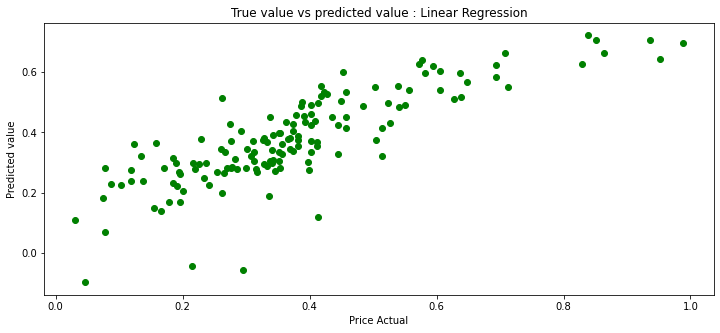

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  
import numpy as np
import matplotlib.pyplot as plt 

#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)
#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()

## KMeans


In [ ]:
#import library
import pandas as pd  
from sklearn.cluster import KMeans

#load dataset
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/mall_customers.csv')

#selecting features  
X = dataset[['annual_income','spending_score']]  

#Define KMeans as cluster_model  
cluster_model = KMeans(n_clusters = 5, random_state = 24)  
labels = cluster_model.fit_predict(X)

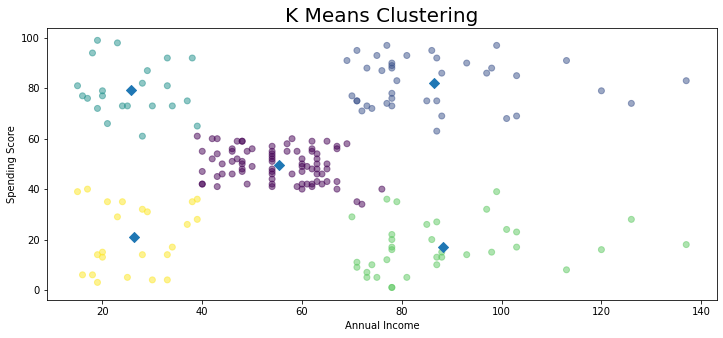

In [ ]:
#import library
import matplotlib.pyplot as plt

#convert dataframe to array
X = X.values
#Separate X to xs and ys --> use for chart axis
xs = X[:,0]
ys = X[:,1]
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = cluster_model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D', s=50)
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Inertia , calculate acuration


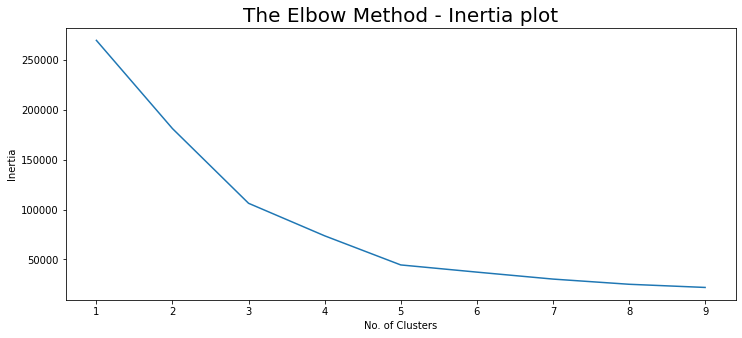

In [ ]:
#import library
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)
    
##Inertia plot
plt.plot(range(1, 10),inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

## Mini Project

In [ ]:
#import library 
import pandas as pd

# Baca data 'ecommerce_banner_promo.csv'
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/ecommerce_banner_promo.csv')

#1. Data eksplorasi dengan head(), info(), describe(), shape
print("\n[1] Data eksplorasi dengan head(), info(), describe(), shape")
print("Lima data teratas:")
print(data.head())
print("Informasi dataset:")
print(data.info())
print("Statistik deskriptif dataset:")
print(data.describe())
print("Ukuran dataset:")
print(data.shape)


[1] Data eksplorasi dengan head(), info(), describe(), shape
Lima data teratas:
   Daily Time Spent on Site  Age  ...        Timestamp  Clicked on Ad
0                     68.95   35  ...   3/27/2016 0:53              0
1                     80.23   31  ...    4/4/2016 1:39              0
2                     69.47   26  ...  3/13/2016 20:35              0
3                     74.15   29  ...   1/10/2016 2:31              0
4                     68.37   35  ...    6/3/2016 3:36              0

[5 rows x 10 columns]
Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line   

In [ ]:
#2. Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
print("\n[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()")
print(data.corr())

#3. Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()
print("\n[3] Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()")
print(data.groupby('Clicked on Ad').size())


[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
                          Daily Time Spent on Site  ...  Clicked on Ad
Daily Time Spent on Site                  1.000000  ...      -0.748117
Age                                      -0.331513  ...       0.492531
Area Income                               0.310954  ...      -0.476255
Daily Internet Usage                      0.518658  ...      -0.786539
Male                                     -0.018951  ...      -0.038027
Clicked on Ad                            -0.748117  ...       1.000000

[6 rows x 6 columns]

[3] Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()
Clicked on Ad
0    500
1    500
dtype: int64


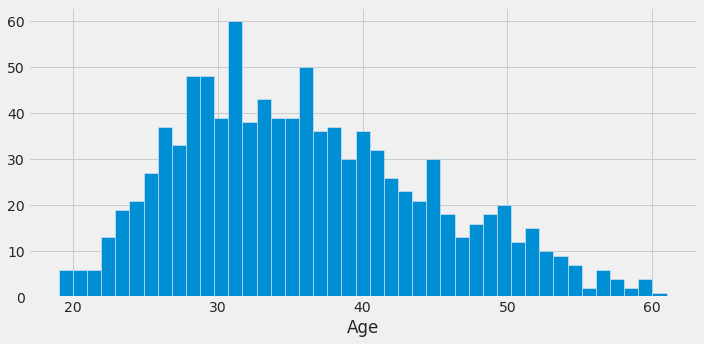

<Figure size 864x360 with 0 Axes>

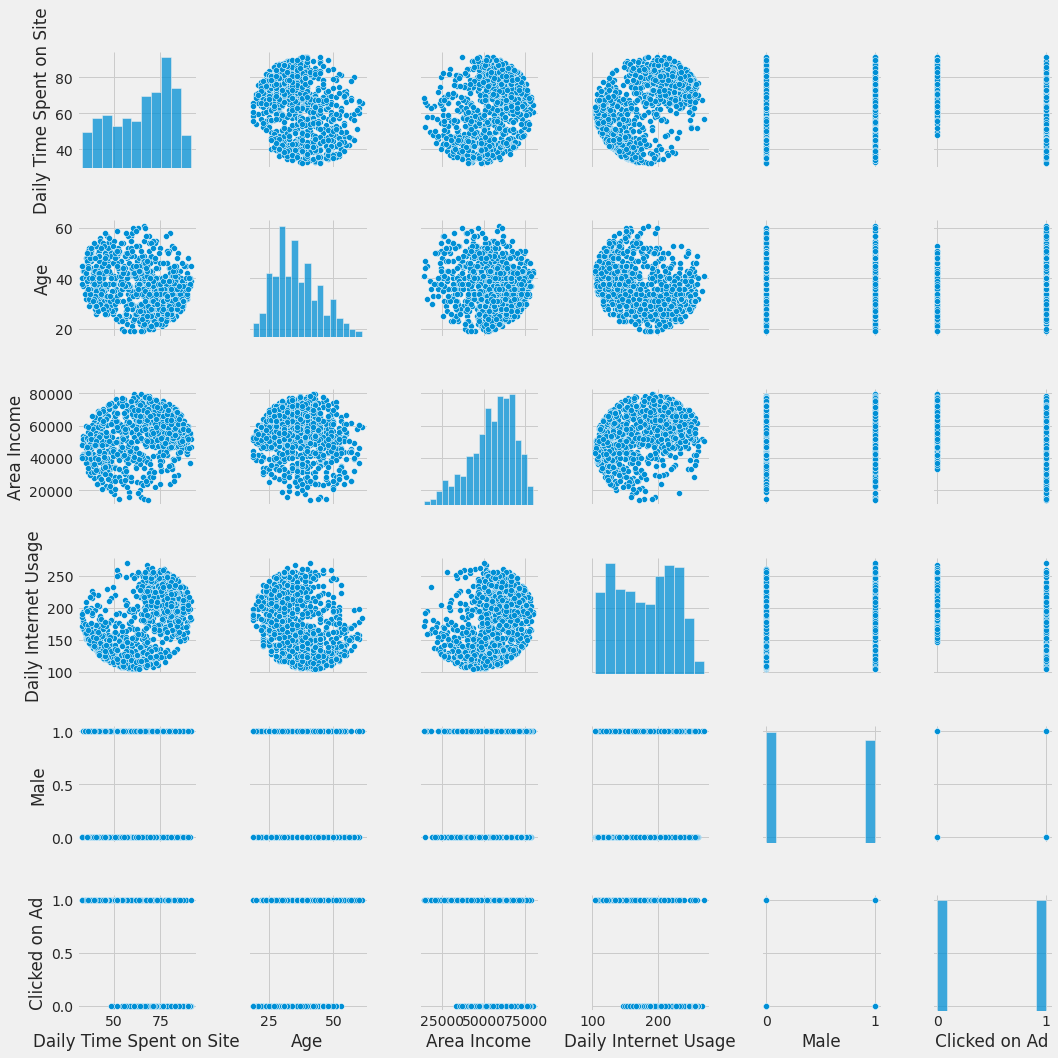

In [ ]:
#import library
import matplotlib.pyplot as plt
import seaborn as sns

# Seting: matplotlib and seaborn
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

#4. Data eksplorasi dengan visualisasi
#4a. Visualisasi Jumlah user dibagi ke dalam rentang usia (Age) menggunakan histogram (hist()) plot
plt.figure(figsize=(10, 5))
plt.hist(data['Age'], bins = data.Age.nunique())
plt.xlabel('Age')
plt.tight_layout()
plt.show()

#4b. Gunakan pairplot() dari seaborn (sns) modul untuk menggambarkan hubungan setiap feature.
plt.figure()
sns.pairplot(data)
plt.show()

In [ ]:
#5. Cek missing value
print("\n[5] Cek missing value")
print(data.isnull().sum().sum())


[5] Cek missing value
0


In [ ]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#6.Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing
print("\n[6] Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing")
#6a.Drop Non-Numerical (object type) feature from X, as Logistic Regression can only take numbers, and also drop Target/label, assign Target Variable to y.
X = data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis = 1)
y = data['Clicked on Ad']

#6b. splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

#6c. Modelling
# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data
logreg = logreg.fit(X_train,y_train)
# Prediksi model
y_pred = logreg.predict(X_test)

#6d. Evaluasi Model Performance
print("Evaluasi Model Performance:")
print("Training Accuracy :", logreg.score(X_train, y_train))
print("Testing Accuracy :", logreg.score(X_test, y_test))


[6] Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing
Evaluasi Model Performance:
Training Accuracy : 0.9
Testing Accuracy : 0.9


In [ ]:
# Import library
from sklearn.metrics import confusion_matrix, classification_report

#7. Print Confusion matrix dan classification report
print("\n[7] Print Confusion matrix dan classification report")

#apply confusion_matrix function to y_test and y_pred
print("Confusion matrix:")
cm = confusion_matrix(y_test,y_pred)
print(cm)

#apply classification_report function to y_test and y_pred
print("Classification report:")
cr = classification_report(y_test,y_pred)
print(cr)


[7] Print Confusion matrix dan classification report
Confusion matrix:
[[85  4]
 [16 95]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



#Data Quality with Python for Beginner
Apa itu Data Profiling?
Pada bagian sebelumnya, aku sudah mempelajari mengenai exploratory data analysis, dimana Exploratory Data Analysis (EDA) adalah menggunakan pendekatan statistik yang bertujuan untuk menemukan dan meringkas sebuah dataset, mengetahui struktur dan hubungan antar variabel dalam dataset. EDA merupakan proses pre-analysis baik untuk descriptive analysis maupun predictive analysis.

Dalam bab ini, aku akan fokus pada satu aspek EDA, yaitu: **Data Profiling!**

 

Data profiling adalah kegiatan merangkum dataset menggunakan statistik deskriptif. Tujuan dari pembuatan data profiling adalah untuk memiliki pemahaman yang kuat tentang data sehingga dapat mulai menyusun framework analisis  dan memvisualisasikan data.


In [ ]:
import pandas as pd
import numpy as np
import io
import pandas_profiling
retail_raw = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced_data_quality.csv')

## faster profiling
`import pandas_profiling`
`pandas_profiling.ProfileReport(retail_raw)`
tapi tidak diketahui cara memakainya

In [ ]:
# Cetak tipe data di setiap kolom retail_raw
print(retail_raw.dtypes)

order_id         int64
order_date      object
customer_id      int64
city            object
province        object
product_id      object
brand           object
quantity       float64
item_price     float64
dtype: object


In [ ]:
# Kolom city
length_city = len(retail_raw['city'])
print('Length kolom city:',length_city)
# Tugas Praktek: Kolom product_id
length_product_id = len(retail_raw['product_id'])
print('Length kolom product_id:',length_product_id)

Length kolom city: 5000
Length kolom product_id: 5000


In [ ]:
# Count kolom city
count_city = retail_raw['city'].count()
print('Count kolom count_city:',count_city)

# Tugas praktek: count kolom product_id
count_product_id = retail_raw['product_id'].count()
print('Count kolom product_id:',count_product_id)

Count kolom count_city: 4984
Count kolom product_id: 4989


In [ ]:
# Missing value pada kolom city
number_of_missing_values_city = length_city - count_city
float_of_missing_values_city = float(number_of_missing_values_city/length_city)
pct_of_missing_values_city = '{0:.1f}%'.format(float_of_missing_values_city * 100)
print('Persentase missing value kolom city:', pct_of_missing_values_city)

# Tugas praktek: Missing value pada kolom product_id
number_of_missing_values_product_id = length_product_id - count_product_id
float_of_missing_values_product_id = float(number_of_missing_values_product_id/length_product_id)
pct_of_missing_values_product_id = '{0:.1f}%'.format(float_of_missing_values_product_id * 100)
print('Persentase missing value kolom product_id:', pct_of_missing_values_product_id)

Persentase missing value kolom city: 0.3%
Persentase missing value kolom product_id: 0.2%


In [ ]:
# Deskriptif statistics kolom quantity
print('Kolom quantity')
print('Minimum value: ', retail_raw['quantity'].min())
print('Maximum value: ', retail_raw['quantity'].max())
print('Mean value: ', retail_raw['quantity'].mean())
print('Mode value: ', retail_raw['quantity'].mode())
print('Median value: ', retail_raw['quantity'].median())
print('Standard Deviation value: ', retail_raw['quantity'].std())

# Tugas praktek: Deskriptif statistics kolom item_price
print('')
print('Kolom item_price')
print('Minimum value: ',retail_raw['item_price'].min())
print('Maximum value: ', retail_raw['item_price'].max())
print('Mean value: ',retail_raw['item_price'].mean())
print('Median value: ', retail_raw['item_price'].median())
print('Standard Deviation value: ', retail_raw['item_price'].std())

Kolom quantity
Minimum value:  1.0
Maximum value:  720.0
Mean value:  11.423987164059366
Mode value:  0    1.0
dtype: float64
Median value:  5.0
Standard Deviation value:  29.442025010811317

Kolom item_price
Minimum value:  26000.0
Maximum value:  29762000.0
Mean value:  933742.7311008623
Median value:  604000.0
Standard Deviation value:  1030829.8104242863


In [ ]:
# Quantile statistics kolom quantity
print('Kolom quantity:')
print(retail_raw['quantity'].quantile([0.25, 0.5, 0.75]))

# Tugas praktek: Quantile statistics kolom item_price
print('')
print('Kolom item_price:')
print(retail_raw['item_price'].quantile([0.25,0.5,0.75]))

Kolom quantity:
0.25     2.0
0.50     5.0
0.75    12.0
Name: quantity, dtype: float64

Kolom item_price:
0.25     450000.0
0.50     604000.0
0.75    1045000.0
Name: item_price, dtype: float64


In [ ]:
print('Korelasi quantity dengan item_price')
print(retail_raw[['quantity', 'item_price']].corr())

Korelasi quantity dengan item_price
            quantity  item_price
quantity    1.000000   -0.133936
item_price -0.133936    1.000000


## Data Cleansing


### Missing Value
- Dibiarkan (not recommended)
- Drop atau hapus (kalau jumlahnya sedikit)
- Filling (mean +- std kalau numerik, mode kalo non numerik)

In [16]:
# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(retail_raw.isnull().any())

# Filling the missing value (imputasi)
print('\nFilling the missing value (imputasi):')
print(retail_raw['quantity'].fillna(retail_raw['quantity'].mean()))

# Drop missing value
print('\nDrop missing value:')
print(retail_raw['quantity'].dropna())

Check kolom yang memiliki missing data:
order_id        0
order_date      0
customer_id     0
city           16
province       12
product_id     11
brand           0
quantity       14
item_price     13
dtype: int64

Filling the missing value (imputasi):
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 5000, dtype: float64

Drop missing value:
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 4986, dtype: float64


In [17]:
print(retail_raw['item_price'].fillna(retail_raw['item_price'].mean()))

0       7.400000e+05
1       6.040000e+05
2       1.045000e+06
3       2.050000e+05
4       9.337427e+05
            ...     
4995    4.500000e+05
4996    1.465000e+06
4997    7.470000e+05
4998    6.950000e+05
4999    1.045000e+06
Name: item_price, Length: 5000, dtype: float64


## Outlier
Outliers merupakan data observasi yang muncul dengan `nilai-nilai ekstrim`. Yang dimaksud dengan nilai-nilai ekstrim dalam observasi adalah `nilai` yang `jauh` atau `beda` sama sekali dengan sebagian besar `nilai lain` dalam `kelompoknya`.

Cara `treatment` terhadap outliers antara lain:
1. Remove the outliers (dibuang)
2. Filling the missing value (imputasi)
3. Capping
4. Prediction

In [18]:
# Q1, Q3, dan IQR
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1-1.5*IQR)) | (retail_raw['quantity'] > (Q3+1.5*IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (5000, 9)
Shape akhir:  (4699, 9)


In [19]:
# Q1, Q3, dan IQR
Q1 = retail_raw['item_price'].quantile(0.25)
Q3 = retail_raw['item_price'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['item_price'] < (Q1-1.5*IQR)) | (retail_raw['item_price'] > (Q3+1.5*IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (4699, 9)
Shape akhir:  (4379, 9)


## Deduplikasi Data
Duplikasi data merupakan data dengan kondisi pada `row-row` tertentu memiliki `kesamaan data` di `seluruh kolomnya`. Tentunya ada data yang duplikat dalam dataset yang dimiliki. Kondisi duplikasi harus diatasi dengan jalan mengeliminir baris yang mengalami duplikasi, sehingga proses ini dikenal dengan deduplikasi.

`retail_raw.duplicated(subset=None)`

`retail_raw.drop_duplicates()`

In [20]:
# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape awal: ', retail_raw.shape)

# Buang data yang terduplikasi
retail_raw.drop_duplicates(inplace=True)

# Check ukuran (baris dan kolom) setelah data duplikasi dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (4379, 9)
Shape akhir:  (4373, 9)


## Mini Project

In [24]:
# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/uncleaned_raw.csv')

#inspeksi dataframe uncleaned_raw
print('Lima data teratas:') 
print(uncleaned_raw.head())

#Check kolom yang mengandung missing value
print('\nKolom dengan missing value:') 
print(uncleaned_raw.isnull().any())

#Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()

#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty

#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty) 

#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty*100) 

#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

Lima data teratas:
   InvoiceNo                          Description  ...  CustomerID      City
0     536365   WHITE HANGING HEART T-LIGHT HOLDER  ...       17850  Surabaya
1     536366                  WHITE METAL LANTERN  ...       17850  Surabaya
2     536367       CREAM CUPID HEARTS COAT HANGER  ...       17850  Surabaya
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE  ...       17850   Jakarta
4     536369       RED WOOLLY HOTTIE WHITE HEART.  ...       17850     Medan

[5 rows x 7 columns]

Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool
Persentase missing value kolom Quantity: 4.0%


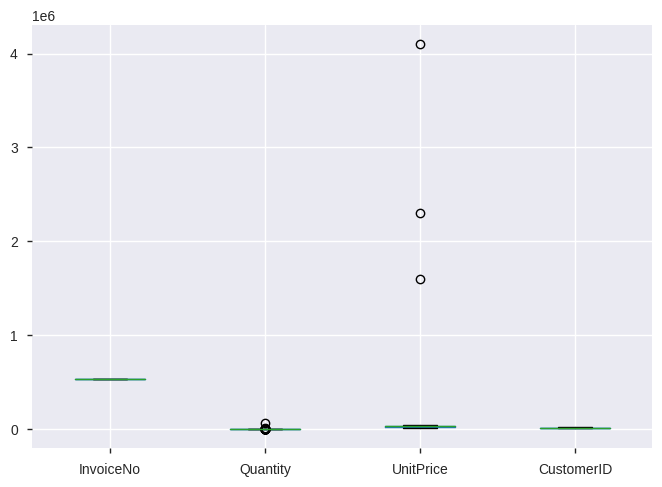

In [26]:
import matplotlib.pyplot as plt

#Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()

In [27]:
#Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw[['UnitPrice']] < (Q1-1.5*IQR)) | (uncleaned_raw[['UnitPrice']] > (Q3+1.5*IQR)))]

#check for duplication
print(uncleaned_raw.duplicated(subset=None))

#remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates()

0      False
1      False
2      False
3      False
4      False
       ...  
500     True
501     True
502     True
503     True
504     True
Length: 505, dtype: bool


# Data Analyst Project: Business Decision Research

Data Analytics Test
Data analytics test ini berisi 2 bagian, teori dan test coding yang masing-masing terdiri dari:

Teori 
- Konsep Dasar Data Analytics: Tes ini dimaksudkan untuk menguji pemahaman member tentang data analytics.

Coding Test
- Data preparation test: Tes ini dimaksudkan untuk menguji kemampuan member dalam melakukan ETL data.
- Data visualization test: Tes ini dimaksudkan untuk menguji kemampuan member dalam hal visualisasi data.
- Basic Stats Method test: Tes ini dimaksudkan untuk menguji kemampuan member dalam melakukan modeling data menggunakan statistika dasar.

In [91]:
# just spacing background case :

##Market Research and Recommendation and Visualization Technique for Business Decision Making

“Aksara, tadi saya forward studi kasus untuk proyek market research dari Kroma. Sudah masuk?” tanya Senja padaku begitu aku sampai di meja.

 

“Iya, notifikasinya sudah masuk. Segera kukerjakan ya.”

 

Aku pun membuka isi email yang dimaksud:

 

`DQLab sport center` adalah toko yang menjual berbagai kebutuhan olahraga seperti Jaket, Baju, Tas, dan Sepatu. Toko ini mulai berjualan sejak tahun 2013, sehingga sudah memiliki pelanggan tetap sejak lama, dan tetap berusaha untuk mendapatkan pelanggan baru sampai saat ini.

 

Di awal tahun 2019,   manajer toko tersebut merekrut junior DA untuk membantu  memecahkan masalah yang ada di tokonya, yaitu menurunnya pelanggan yang membeli kembali ke tokonya.  Junior DA tersebut pun diberi kepercayaan mengolah data transaksi toko tersebut. Manajer toko mendefinisikan bahwa customer termasuk sudah bukan disebut pelanggan lagi (churn) ketika dia sudah tidak bertransaksi ke tokonya lagi sampai dengan 6 bulan terakhir dari update data terakhir yang tersedia.  

Manajer toko pun memberikan data transaksi dari tahun 2013 sampai dengan 2019 dalam bentuk csv (comma separated value) dengan data_retail.csv dengan jumlah baris 100.000 baris data.

Berikut tampilan datanya:



 

Field yang ada pada data tersebut antara lain:

No
Row_Num
Customer_ID
Product
First_Transaction
Last_Transaction
Average_Transaction_Amount
Count_Transaction

“Sudah kamu baca?” tanya Senja lagi.

Aku mengangguk seraya menyimak kembali isi studi kasus yang perlu kudapatkan solusinya.  

“Jadi, manajer toko dan junior DA di salah satu cabang kita minta bantuan kamu untuk mengurusi riset pasar mereka dengan data dan persoalan tadi. Ada baiknya sembari kamu mengerjakan, buat laporan kerjamu langkah per langkah agar bisa diketahui proses analisis datanya untuk mengatasi kasus ini.”

“Siap!” Dengan saran dari Senja, aku pun membuat catatan dari awal pengerjaan hingga selesai agar lebih sistematis untuk dilaporkan pada Kroma nanti, seperti ini:

`Data preparation test`
- `Importing data:` Melakukan import data_retail.csv ke python environment.
- `Cleansing data:` Melakukan pembersihan dan modifikasi data sehingga siap digunakan untuk analisis lebih lanjut.

`Data visualization test:` Mendapatkan insight dari hasil visualisasi yang telah dibuat.

`Basic stats method test:` Mendapatkan insight dari model dan evaluasi model yang sudah dibuat dan diuji.

In [92]:
import pandas as pd

df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/data_retail.csv', sep=';')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  ...  Average_Transaction_Amount Count_Transaction
0   1        1  ...                     1467681                22
1   2        2  ...                     1269337                41
2   3        3  ...                      310915                30
3   4        4  ...                      722632                27
4   5        5  ...                     1775036                25

[5 rows x 8 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 

In [93]:
# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  ...  Average_Transaction_Amount Count_Transaction
0   1        1  ...                     1467681                22
1   2        2  ...                     1269337                41
2   3        3  ...                      310915                30
3   4        4  ...                      722632                27
4   5        5  ...                     1775036                25

[5 rows x 8 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null 

###Churn Customers

In [94]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

2019-02-01 23:57:57.286000013
Lima data teratas:
   no  Row_Num  ...  Count_Transaction is_churn
0   1        1  ...                 22    False
1   2        2  ...                 41    False
2   3        3  ...                 30    False
3   4        4  ...                 27    False
4   5        5  ...                 25    False

[5 rows x 9 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[n

In [95]:
# Hapus kolom-kolom yang tidak diperlukan
del df['no']
del df['Row_Num']
# Cetak lima data teratas
print(df.head())

   Customer_ID Product  ... Count_Transaction is_churn
0        29531   Jaket  ...                22    False
1        29531  Sepatu  ...                41    False
2       141526     Tas  ...                30    False
3       141526   Jaket  ...                27    False
4        37545  Sepatu  ...                25    False

[5 rows x 7 columns]


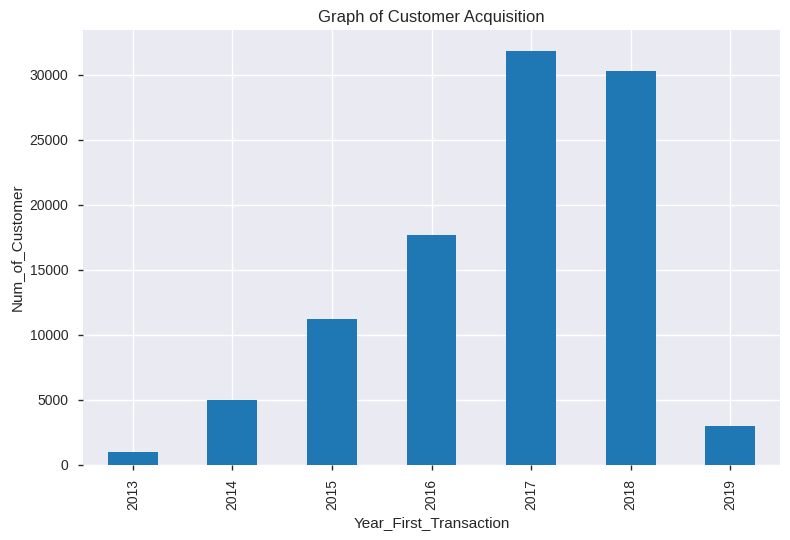

In [96]:
import matplotlib.pyplot as plt

# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

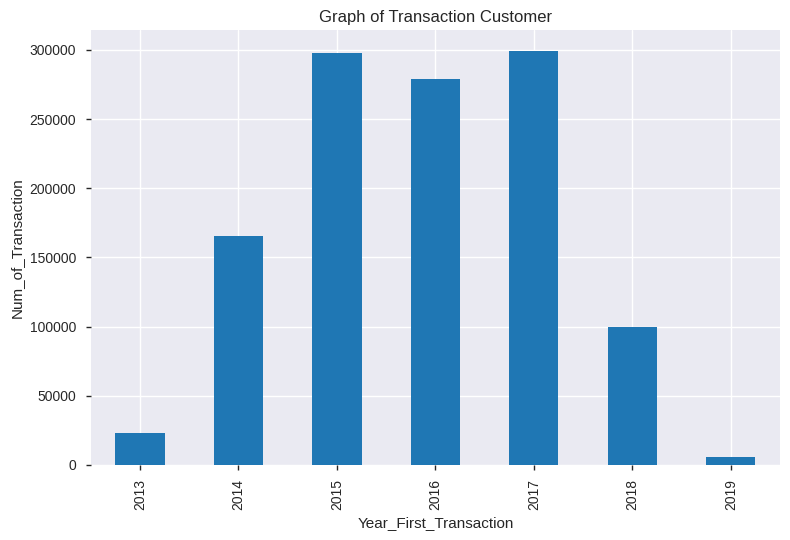

In [97]:
import matplotlib.pyplot as plt

plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

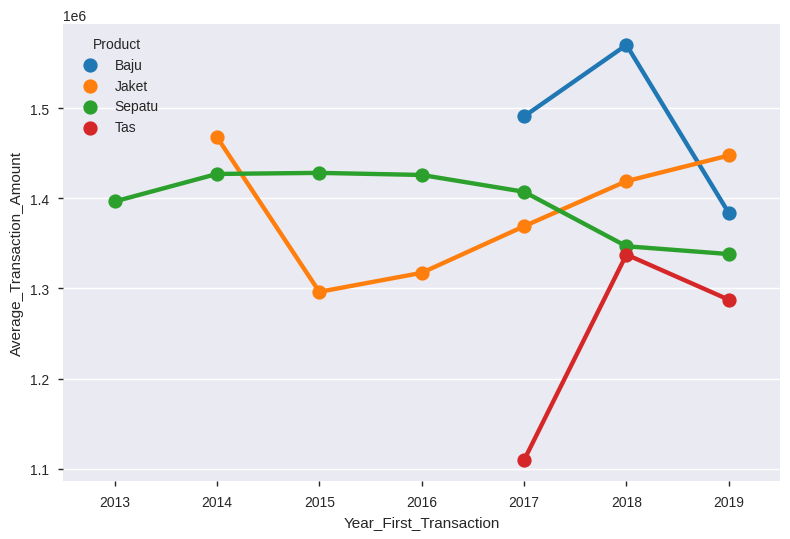

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

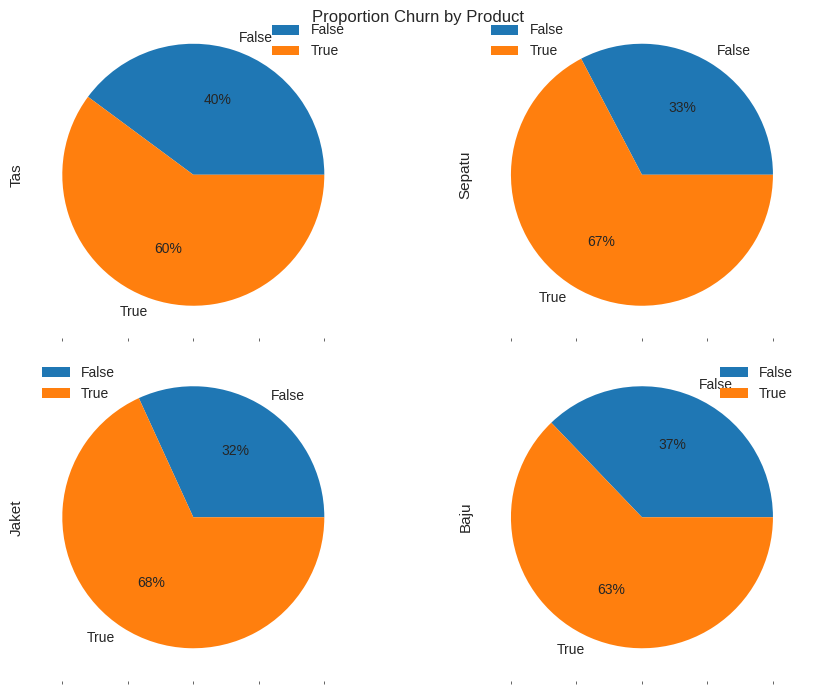

In [99]:
import matplotlib.pyplot as plt

plt.clf()
# Melakukan pivot data
df_piv = df.pivot_table(index='is_churn',
columns='Product',
values='Customer_ID',
aggfunc='count',
fill_value=0)
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
figsize=(10, 7),
layout=(-1, 2),
autopct='%1.0f%%',
title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

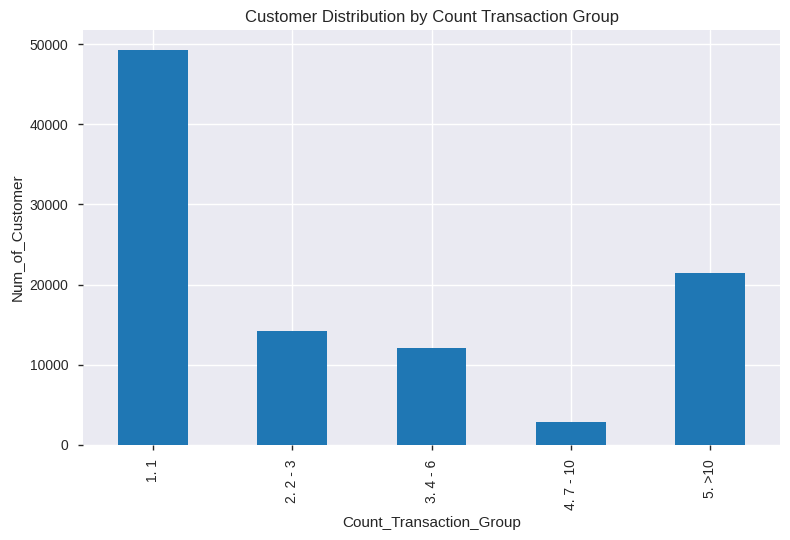

In [100]:
import matplotlib.pyplot as plt

plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
        val ='2. 2 - 3'
    elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
        val ='3. 4 - 6'
    elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
        val ='4. 7 - 10'
    else:
        val ='5. >10'
    return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

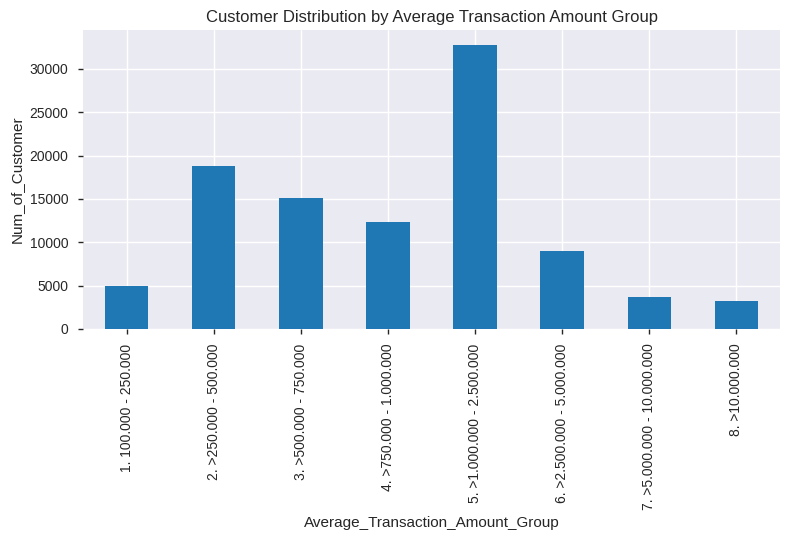

In [101]:
import matplotlib.pyplot as plt

plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

In [102]:
# Feature column: Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns] 

# Target variable
y = df['is_churn'] 

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

### error
 karena belum di pre processing datanya, ada missing value

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

ValueError: ignored

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

